##Zomato data analysis project



####Import relevent libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####Create the DataFrame

In [101]:
df = pd.read_csv('Zomato data .csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [102]:
df.shape #Size of the datasets

(148, 7)

In [103]:
df.info() # Chack details of datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [104]:
df.isnull().sum()  # Check a null values

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [105]:
def handleRate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)

df['rate'] = df['rate'].apply(handleRate)
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


###1. What type of restaurant do the majority of customers order from?


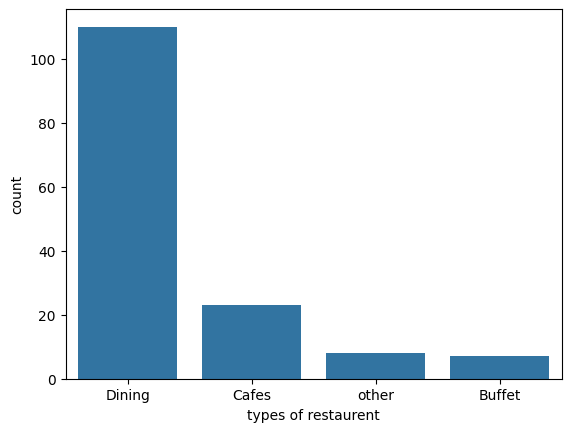

In [106]:
sns.countplot(x=df['listed_in(type)'],order = df['listed_in(type)'].value_counts().index)
plt.xlabel('types of restaurent')
plt.show()

####Conclusion :- Mejority of the resturants falls in dining category.

###2. How many votes has each type of restaurant received from customers?


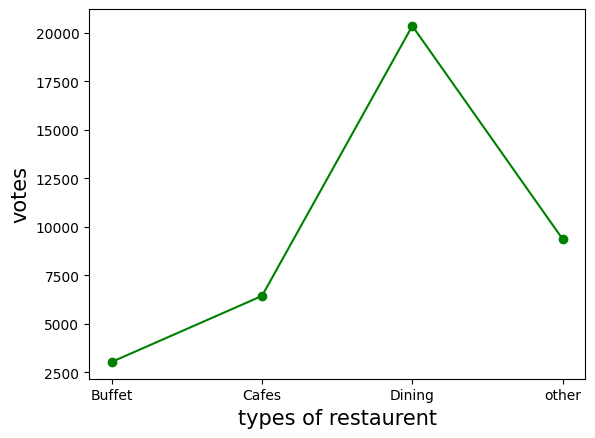

In [107]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('types of restaurent', size=15)
plt.ylabel('votes', size=15)
plt.show()

###Conclusion :- Dinning restaurant has recieved maximum votes.

###3. What are the ratings that the majority of restaurants have received?


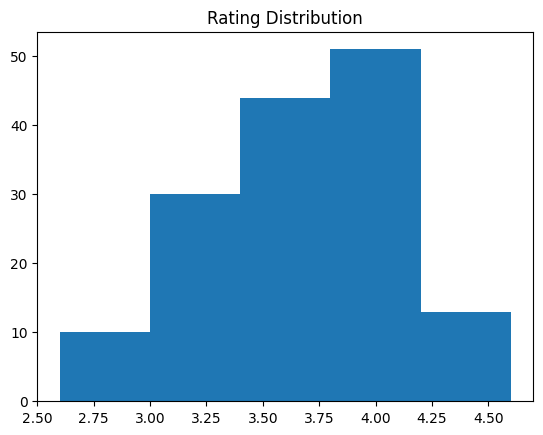

In [108]:
plt.hist(df['rate'],bins=5)
x= df['rate']

plt.title('Rating Distribution')
plt.show()

####Conclusion :- The majority restaurants received rating from 3.5 to 4.


###4. Zomato has observed that most couples order most of their food online. What is the average spending on each order?


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

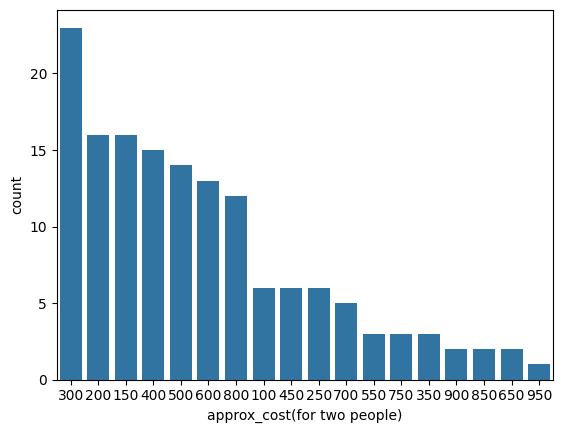

In [109]:
sns.countplot(x=df['approx_cost(for two people)'], order=df['approx_cost(for two people)'].value_counts().index)

####Conclusions:- The majority of couples preffer restaurants with an approximate cost of 30  rupees.


###5. Which mode (online or offline) has received the maximum rating?


<Axes: xlabel='online_order', ylabel='rate'>

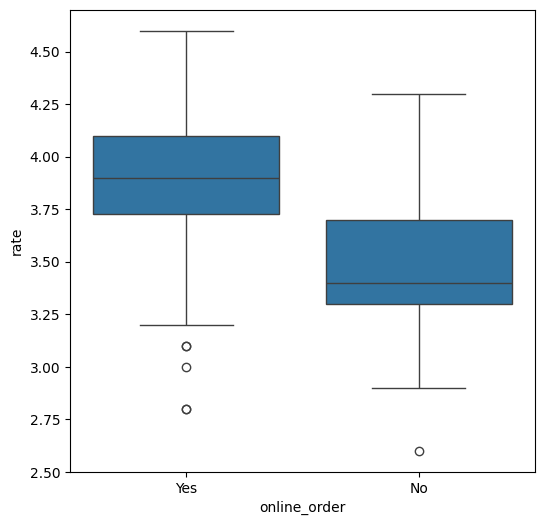

In [110]:
plt.figure(figsize= (6,6))
sns.boxplot(x='online_order', y = 'rate', data=df)

####Conclusion:- Offline order received rating in comparison to online order.

####6. Which type of restaurant received more offline orders, so that Zomato can customers with some good offers?

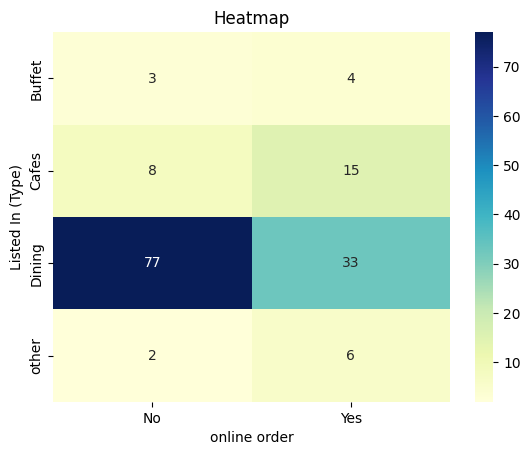

In [111]:
pivot_table = df.pivot_table(index='listed_in(type)', columns = 'online_order', aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title("Heatmap")
plt.xlabel("online order")
plt.ylabel('Listed In (Type)')
plt.show()

####Conclusion:- Dinning restaurants primarily accept offline orders, whereas cafes primarily recieve online orders. This suggests that clients prffer orders in person at restaurants, but prefer online ordering at cafes.
